<a href="https://colab.research.google.com/github/nedokormysh/GB_App_Statistics_Med/blob/lesson_3_descriptive_stat/GB_app_statistics_med_hw_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Урок 3.
Описательные статистики и построение распределений

**Популярные параметрические и непараметрические тесты**


# Условие
Поработаем с таблицами, для которых на предыдущем занятии вы изучали описательные статистики.

Сформулируйте несколько гипотез для 2 групп, которые можно проверить на имеющихся данных. Укажите, зависимые или независимые выборки, ЗП, НП.

Выберите подходящий тест и проверьте ваши предположения.

Задание выполняется на языке R и предоставляется в формате Google Colab.

In [ ]:
install.packages('tidyverse')
install.packages('skimr')
install.packages('psych')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)
require(readxl)
library(skimr)

# Загрузка данных

In [ ]:
hdl <- read_tsv('https://raw.githubusercontent.com/nedokormysh/GB_App_Statistics_Med/lesson_2_descriptive_statistics/high_density_lipids.tsv') |>
  select(-Name) %>%
  mutate(Patient.number = as.factor(Patient.number),
         Vial.number = as.factor(Vial.number))

ldl <- read_tsv('https://raw.githubusercontent.com/nedokormysh/GB_App_Statistics_Med/lesson_2_descriptive_statistics/low_density_lipids.tsv') |>
  select(-Name) %>%
  mutate(Patient.number = as.factor(Patient.number),
         Vial.number = as.factor(Vial.number))

lipids <- full_join(hdl, ldl, by = c("Vial.number", "Patient.number"),
 suffix = c('hdl', 'ldl'))

Rows: 27 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): Name
dbl (37): Vial.number, Patient.number, GPHDL1, GPHDL2, GPHDL3, GPHDL4, GPHDL...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 29 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): Name
dbl (37): Vial.number, Patient.number, GPLDL1, GPLDL2, GPLDL3, GPLDL4, GPLDL...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
meta <- read_xlsx('/content/metadata.xlsx', sheet = 1) |>
  rename_with(make.names)

descriptive <- read_xlsx('/content/metadata.xlsx', sheet = 2) |>
  rename('Variable' = '...1', 'Description' = '...2') |>
  drop_na()

descriptive[10,]$Variable <- 'LVH'

for (col_name in colnames(meta)) {
  index <- match(col_name, descriptive$Variable)

  if (!is.na(index)) {
    attr(meta[[col_name]], 'label') <- descriptive$Description[index]
  }
}

In [ ]:
# Выбираем столбцы с данными пациентов
patient_cols <- c('Vial.number',
                  'Patient.number',
                  'Name',
                  'Date',
                  'Age')


# Создаем таблицу с данными пациентов
patient_data <- meta[patient_cols]

# Создаем таблицу с клиническими данными
clinical_data <- meta |> select(-Name, -Age, -Date, -Sucrose)

# заменяем 3 точки на точку во всех названиях столбцов
colnames(clinical_data) <- sub("\\.+", ".", colnames(clinical_data))

colnames_factor = c('Vial.number', 'Patient.number', 'Group', 'Sm', 'Dm', 'HT',
                    'LVH', 'IHD', 'MI', 'Str', 'A_C', 'A_H', 'A_D', 'Plaque',
                    'Statins')

# преобразуем указанные столбцы в фактор
clinical_data[, colnames_factor] <- lapply(clinical_data[, colnames_factor], as.factor)

Сформулируйте несколько гипотез для 2 групп, которые можно проверить на имеющихся данных. Укажите, зависимые или независимые выборки, ЗП, НП.

# Гипотезы

## Гипотеза 1:

У пациентов с сахарным диабетом (Dm=1) средний уровень триглицеридов (Tgi) выше, чем у пациентов без сахарного диабета (Dm=0).

Нулевая гипотеза (H0): Средний уровень триглицеридов у пациентов с сахарным диабетом равен среднему уровню триглицеридов у пациентов без сахарного диабета.

Альтернативная гипотеза (H1): Средний уровень триглицеридов у пациентов с сахарным диабетом выше, чем средний уровень триглицеридов у пациентов без сахарного диабета.

In [ ]:
# head(clinical_data, 5)

ЗП - уровень триглицеридов.

НП - наличие сахарного диабета.

Независимые выборки.

In [ ]:
# clinical_data$Tgi.26

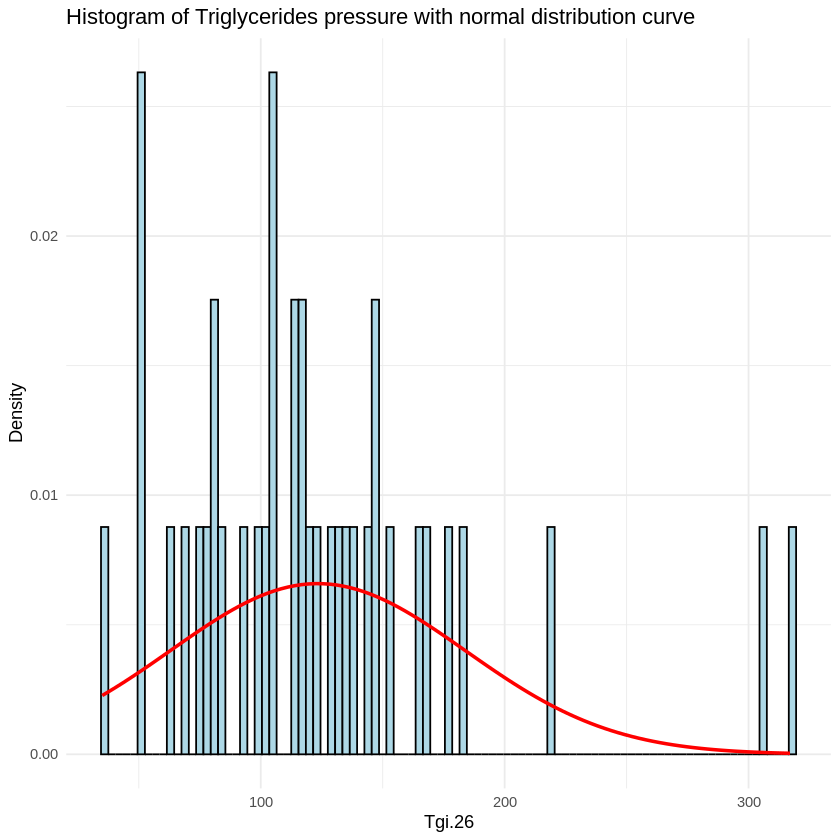


	Shapiro-Wilk normality test

data:  clinical_data$Tgi.26
W = 0.87282, p-value = 0.0004746


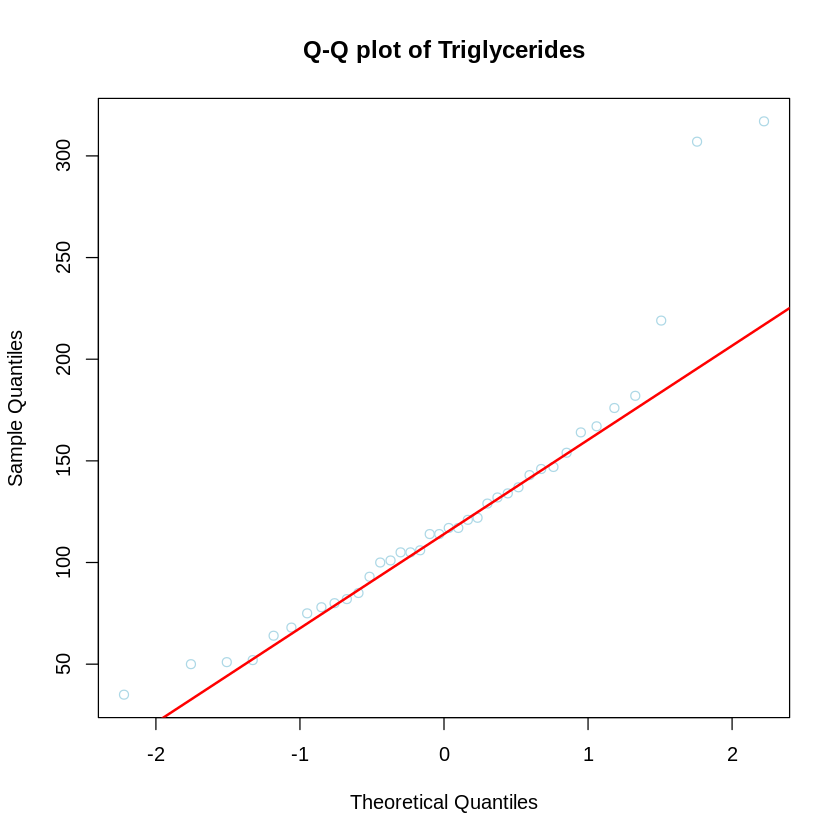

In [ ]:
ggplot(clinical_data, aes(x = Tgi.26)) +
  geom_histogram(aes(y = ..density..), binwidth = 3, fill = 'lightblue', color = 'black') +
  stat_function(fun = dnorm, args = list(mean = mean(clinical_data$Tgi.26), sd = sd(clinical_data$Tgi.26)),
                color = 'red', size = 1) +
  theme_minimal() +
  labs(title = 'Histogram of Triglycerides pressure with normal distribution curve',
       x = 'Tgi.26',
       y = 'Density')

# Q-Q plot
qqnorm(clinical_data$Tgi.26, main = 'Q-Q plot of Triglycerides', col = 'lightblue')
qqline(clinical_data$Tgi.26, col = 'red', lwd = 2)

# Тест Шапиро-Уилка
shapiro.test(clinical_data$Tgi.26)

Нет нормального распределения. Поэтому должны использовать тест непараметрический тест Манна-Уитни.

Либо логарифмировать данные или удалять выбросы.

In [ ]:
# clinical_data_no_na <- na.omit(clinical_data)

# clinical_data_no_na |>
#   t.test(Tgi.26 ~ Dm, data = .)

# Так и не понял почему у меня не выполняется код выше. Находит какие-то пустые строки. Поэтому простой ttest.

In [ ]:
clinical_data_no_na <- na.omit(clinical_data)
with(clinical_data_no_na, wilcox.test(Tgi.26 ~ Dm))

Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  Tgi.26 by Dm
W = 42.5, p-value = 0.8377
alternative hypothesis: true location shift is not equal to 0


Результаты показывают, что W-статистика равна 42.5, а p-значение равно 0.8377. Это означает, что наблюдаемое различие между группами не является статистически значимым при уровне значимости 0.05.

Ради интереса посмотрим на t-test

In [ ]:
t.test(Tgi.26 ~ Dm, data = clinical_data, na.action = na.omit)


	Welch Two Sample t-test

data:  Tgi.26 by Dm
t = -0.0047477, df = 4.5311, p-value = 0.9964
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -65.85066  65.61537
sample estimates:
mean in group 0 mean in group 1 
       123.3824        123.5000 


Результаты показывают, что t-статистика равна -0.0047, df (степени свободы) равны 4.5311, а p-значение равно 0.9964. Это означает, что наблюдаемое различие между средними значениями двух групп не является статистически значимым при уровне значимости 0.05. Альтернативная гипотеза, что разница между средними значениями групп без сахарного диабета и с болезнью не равна нулю, не может быть подтверждена.


95%-й доверительный интервал для разности средних значений между группами 0 и 1 составляет от -65.85066 до 65.61537. Это означает, что с вероятностью 95% истинная разница средних значений между группами лежит в пределах этого интервала.


Среднее значение в группе 0 равно 123.3824, а среднее значение в группе 1 равно 123.5000. Эти значения очень близки друг к другу, что согласуется с тем, что t-тест не обнаружил статистически значимой разницы между группами.

Отсутствие доказательств в пользу того, что средние значения двух групп различаются.

In [ ]:
# ggplot(clinical_data, aes(x = Tgi.26)) +
#   geom_histogram(binwidth = 3, fill = 'lightblue', color = 'black')

## Гипотеза 2:

У пациентов с гипертонией (HT=1) средний уровень холестерина (Choi) выше, чем у пациентов без гипертонии (HT=0). Нулевая гипотеза (H0): Средний уровень холестерина у пациентов с гипертонией равен среднему уровню холестерина у пациентов без гипертонии.

Альтернативная гипотеза (H1): Средний уровень холестерина у пациентов с гипертонией выше, чем средний уровень холестерина у пациентов без гипертонии.

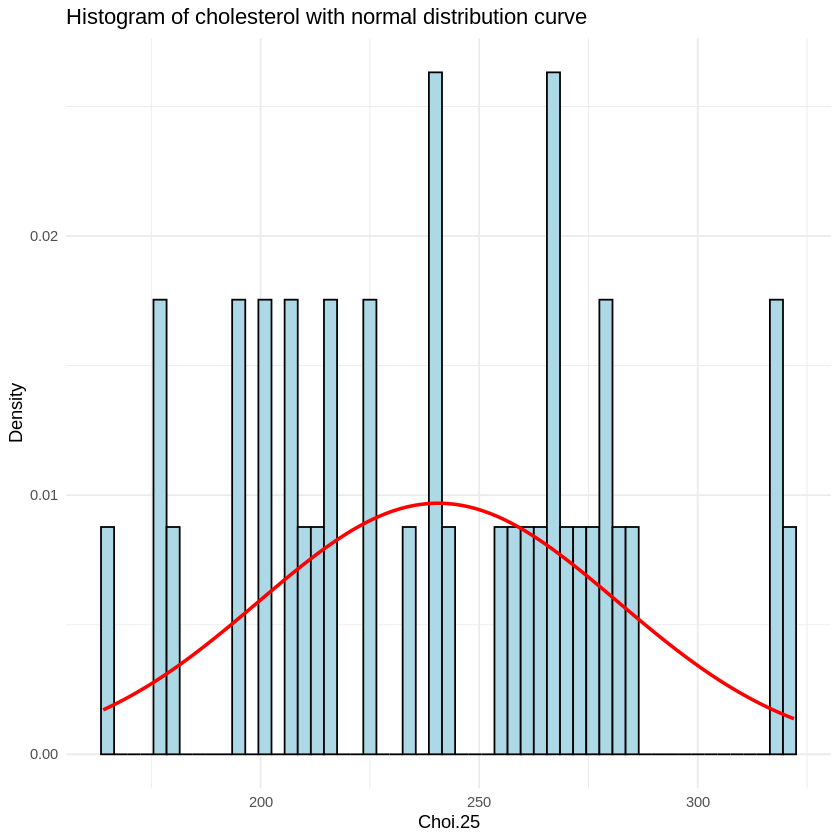


	Shapiro-Wilk normality test

data:  clinical_data$Choi.25
W = 0.96942, p-value = 0.3763


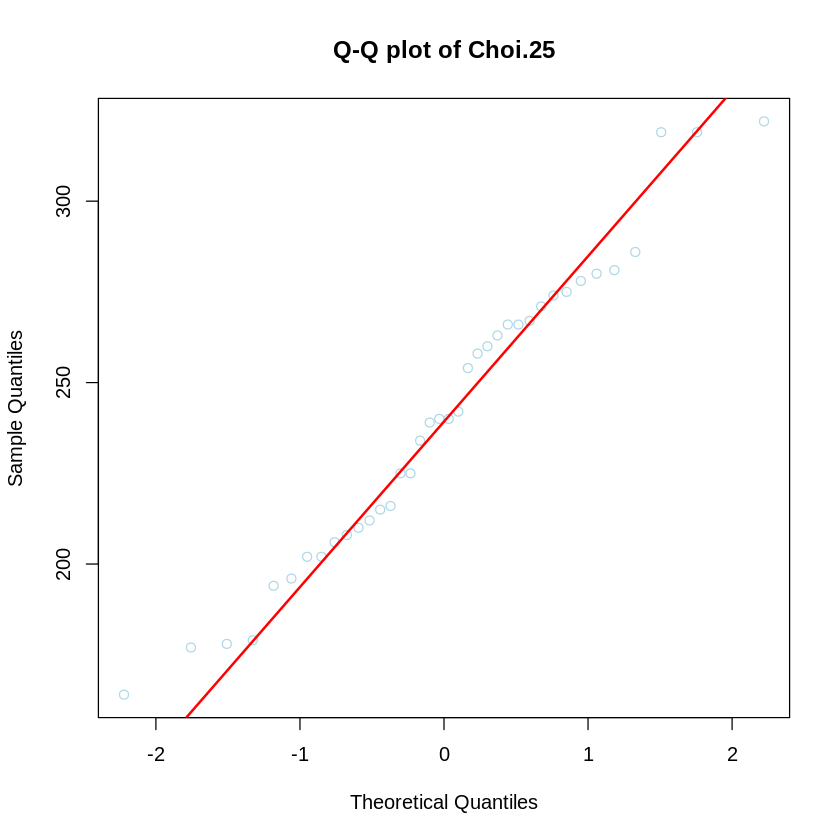

In [ ]:
# Гистограмма
ggplot(clinical_data, aes(x = Choi.25)) +
  geom_histogram(aes(y = ..density..), binwidth = 3, fill = 'lightblue', color = 'black') +
  stat_function(fun = dnorm, args = list(mean = mean(clinical_data$Choi.25), sd = sd(clinical_data$Choi.25)),
                color = 'red', size = 1) +
  theme_minimal() +
  labs(title = 'Histogram of cholesterol with normal distribution curve',
       x = 'Choi.25',
       y = 'Density')

# Q-Q plot
qqnorm(clinical_data$Choi.25, main = 'Q-Q plot of Choi.25', col = 'lightblue')
qqline(clinical_data$Choi.25, col = 'red', lwd = 2)

# Тест Шапиро-Уилка
shapiro.test(clinical_data$Choi.25)

По Шапиро-Уилку - нормальное распределение. Хотя концы распределения и уходят. И нет всё таки 45 градусов наклона.

ЗП - общий уровень холистерина.

НП - наличие гипертонии.

Независимые выборки.

Тут вроде бы можем использовать t-test.

Warning message:
“Use of `clinical_data$HT` is discouraged.
ℹ Use `HT` instead.”


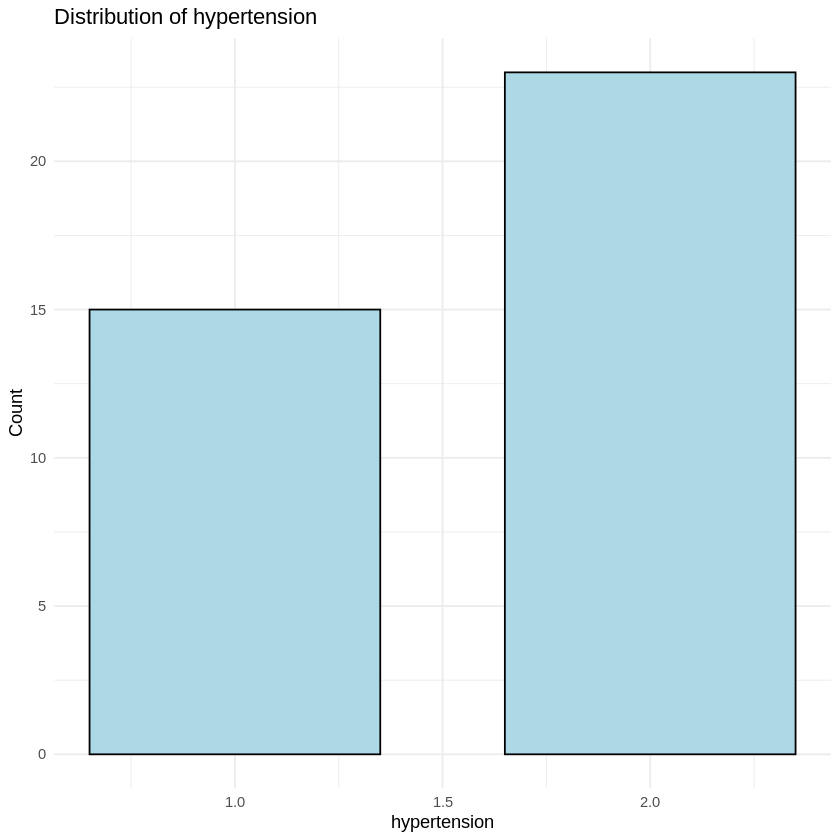

In [ ]:
ggplot(data = clinical_data, aes(x = as.numeric(clinical_data$HT))) +
  geom_bar(color = 'black', fill = "lightblue", width = 0.7) +
  theme_minimal() +
  labs(title = "Distribution of hypertension",
       x = "hypertension",
       y = "Count")

In [ ]:
# clinical_data |>
#   drop_na() |>
#   t.test(Choi.25 ~ HT, data = .)

In [ ]:
t.test(Choi.25 ~ HT, data = clinical_data, na.action = na.omit)


	Welch Two Sample t-test

data:  Choi.25 by HT
t = -0.78493, df = 34.613, p-value = 0.4378
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -36.77847  16.27412
sample estimates:
mean in group 0 mean in group 1 
       234.4000        244.6522 


p-значение равно 0.4378. Это означает, что наблюдаемое различие между средними значениями двух групп не является статистически значимым при уровне значимости 0.05.

Среднее значение в группе 0 (с отсутсвием гипертензия) равно 234.4, а среднее значение в группе 1 (с гипертензией) равно 244.6522. Значения несколько отличаются друг от друга, но t-тест не обнаружил статистически значимой разницы между группами.

Отсутствие доказательств в пользу того, что средние значения двух групп различаются.

## Гипотеза 3:

У пациентов, принимающих статины (Statins=1), средний уровень липопротеинов низкой плотности (LDLi) ниже, чем у пациентов, не принимающих статины (Statins=0).

Нулевая гипотеза (H0): Средний уровень липопротеинов низкой плотности у пациентов, принимающих статины, равен среднему уровню липопротеинов низкой плотности у пациентов, не принимающих статины.

Альтернативная гипотеза (H1): Средний уровень липопротеинов низкой плотности у пациентов, принимающих статины, ниже, чем средний уровень липопротеинов низкой плотности у пациентов, не принимающих статины.

Warning message:
“Use of `clinical_data$Statins` is discouraged.
ℹ Use `Statins` instead.”
Warning message:
“Removed 1 rows containing non-finite values (`stat_count()`).”


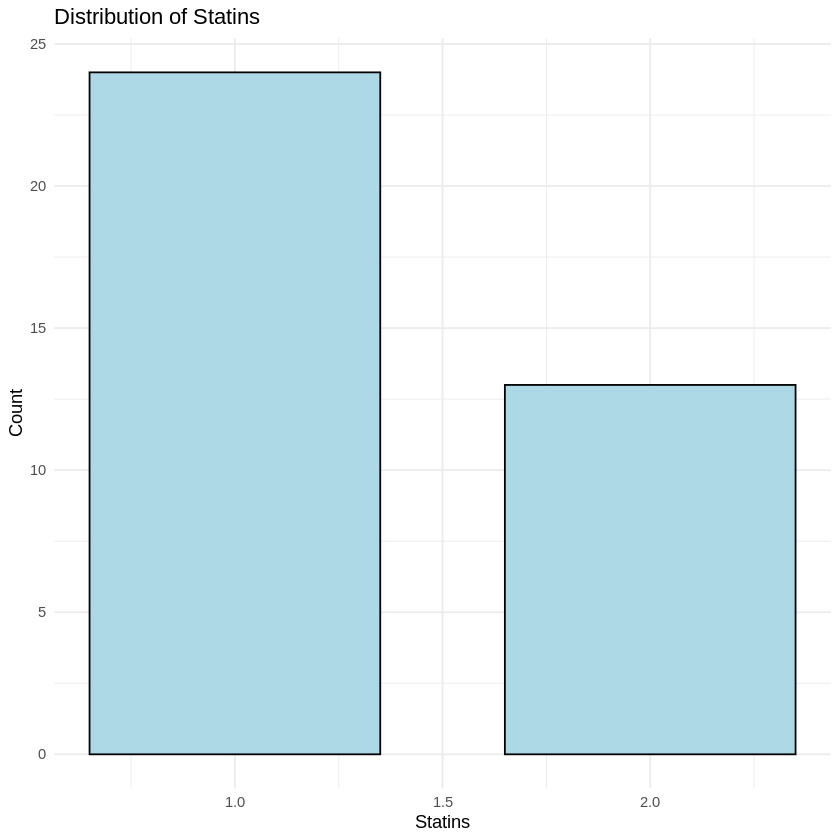

In [ ]:
ggplot(data = clinical_data, aes(x = as.numeric(clinical_data$Statins))) +
  geom_bar(color = 'black', fill = "lightblue", width = 0.7) +
  theme_minimal() +
  labs(title = "Distribution of Statins",
       x = "Statins",
       y = "Count")

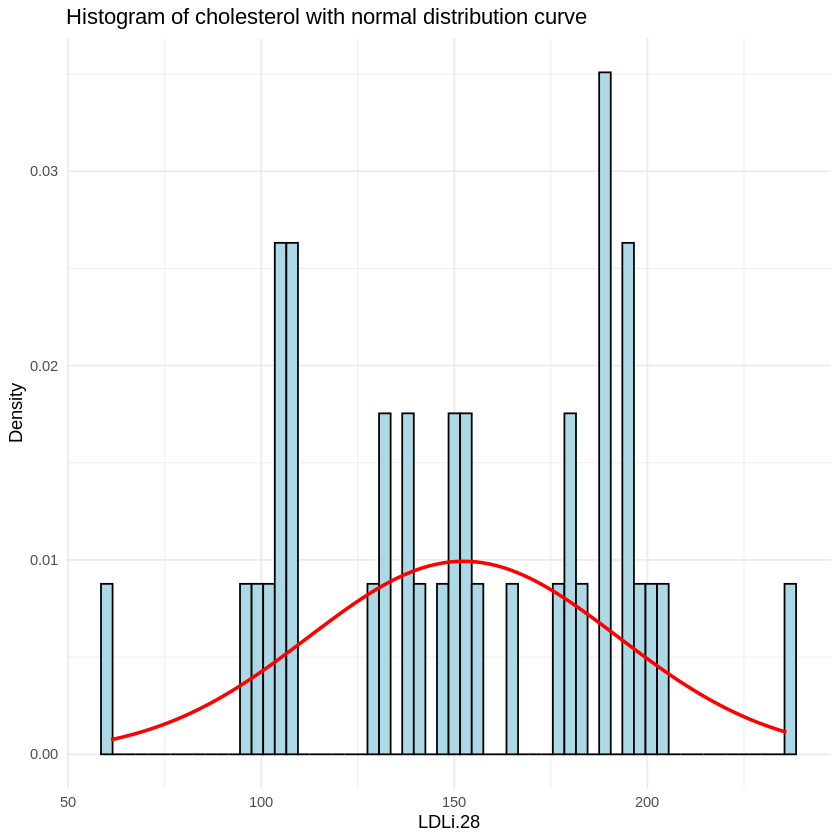


	Shapiro-Wilk normality test

data:  clinical_data$LDLi.28
W = 0.95846, p-value = 0.1691


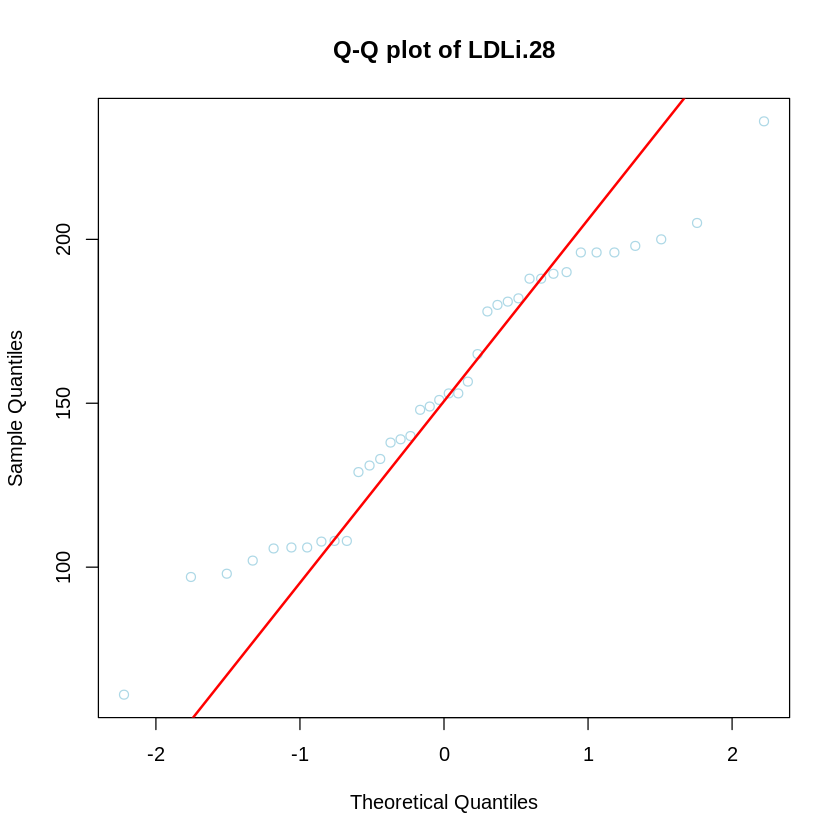

In [ ]:
# Гистограмма
ggplot(clinical_data, aes(x = LDLi.28)) +
  geom_histogram(aes(y = ..density..), binwidth = 3, fill = 'lightblue', color = 'black') +
  stat_function(fun = dnorm, args = list(mean = mean(clinical_data$LDLi.28), sd = sd(clinical_data$LDLi.28)),
                color = 'red', size = 1) +
  theme_minimal() +
  labs(title = 'Histogram of cholesterol with normal distribution curve',
       x = 'LDLi.28',
       y = 'Density')

# Q-Q plot
qqnorm(clinical_data$LDLi.28, main = 'Q-Q plot of LDLi.28', col = 'lightblue')
qqline(clinical_data$LDLi.28, col = 'red', lwd = 2)

# Тест Шапиро-Уилка
shapiro.test(clinical_data$LDLi.28)

По Шапиро-Уилку - нормальное распределение. Но мне кажется, что размер выборки нам даёт неверный результат и у нас слишком концы отличаются от нормального распределения.

ЗП - средний уровень липопротеинов низкой плотности.

НП - приём статинов.

Независимые выборки.

In [ ]:
with(clinical_data_no_na, wilcox.test(LDLi.28 ~ Statins))

Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  LDLi.28 by Statins
W = 132, p-value = 0.003185
alternative hypothesis: true location shift is not equal to 0


 p-значение равно 0.003185. Это означает, что наблюдаемое различие между группами статистически значимо при уровне значимости 0.05. Т.е. у нас подтверждается альтернативная гипотеза.

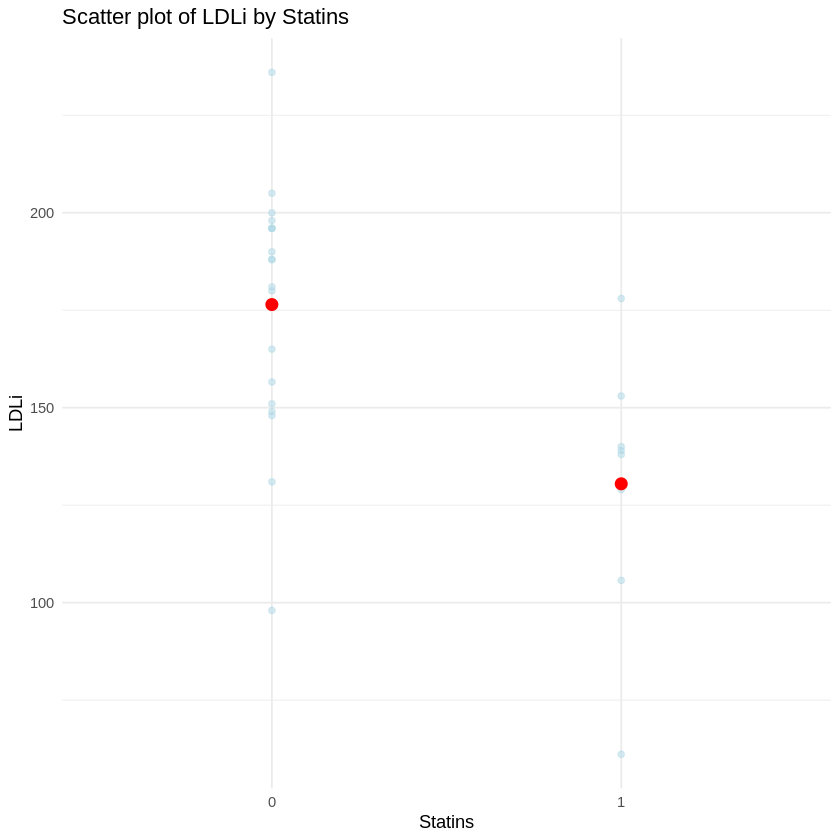

In [ ]:
# рассмотрим уровень ЛПНП в этих двух группах пациентов.
# Преобразуем бинарную переменную Statins в числовую переменную
clinical_data_no_na$HT_num <- as.numeric(clinical_data_no_na$Statins == "1")

# Вычисляем средние значения LDLi для каждого значения Statins
mean_ldl_by_statins <- clinical_data_no_na %>%
  group_by(Statins) %>%
  summarise(mean_ldl = mean(LDLi.28, na.rm = TRUE))

# # Построим диаграмму рассеяния
ggplot(data = clinical_data_no_na, aes(x = Statins, y = LDLi.28)) +
  geom_point(alpha = 0.5, color = "lightblue") +
  geom_point(data = mean_ldl_by_statins, aes(x = Statins, y = mean_ldl), size = 3, color = "red") +
  theme_minimal() +
  labs(title = "Scatter plot of LDLi by Statins",
       x = "Statins",
       y = "LDLi")